In [1]:
import numpy as np 
import pandas as pd 
import cv2
import os
import keras

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers
from keras import applications
from keras.optimizers import Adam
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tqdm import tqdm
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import cv2
from keras import backend as K

In [2]:
# Load data
df_train = '../input/fer2013/train'
df_test = '../input/fer2013/test'

In [7]:
# Check data
import os
files = []
for dirname, dirs, filenames in os.walk(df_train, topdown=True):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

Text(0.5, 0, '(48, 48, 3)')

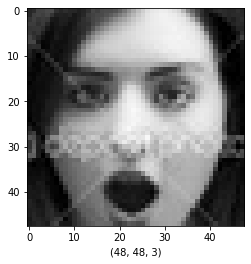

In [8]:
image = cv2.imread(files[0])
plt.imshow(image)
plt.xlabel(image.shape)

In [9]:
Data = []
Target = []
resize = 50

In [10]:
for imagePath in tqdm(files):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(label)

100%|██████████| 28709/28709 [02:19<00:00, 206.12it/s]


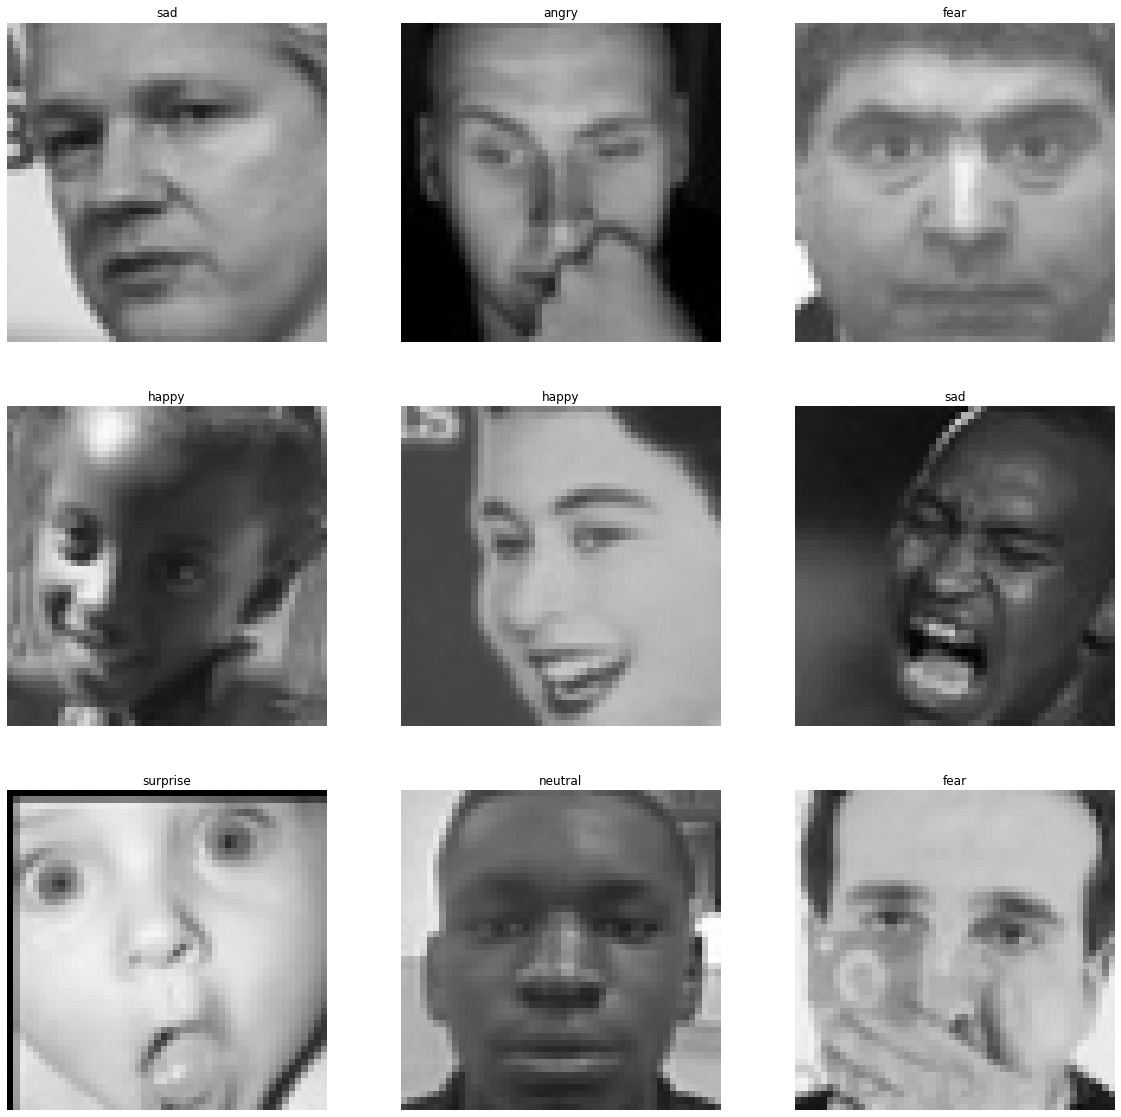

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(Data),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(Data[i])   
    plt.axis('off')
    plt.title(Target[i])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Labels', ylabel='count'>

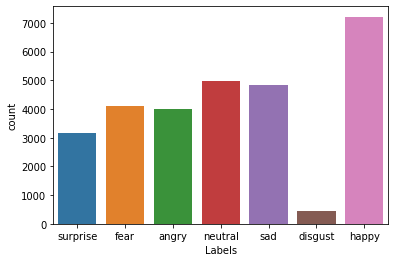

In [12]:
df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])

In [13]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Target)
encoded_Target = encoder.transform(Target)
# convert integers to dummy variables (i.e. one hot encoded)
encoded_Target = np_utils.to_categorical(encoded_Target)

In [18]:
print(encoder.classes_)

print(encoded_Target[1])

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
[0. 0. 0. 0. 0. 0. 1.]


In [19]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(encoded_Target), test_size=0.2, random_state=42,stratify=encoded_Target)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [20]:
del Data
del Target

In [21]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(22967, 50, 50, 3)
(4593, 50, 50, 3)
(1149, 50, 50, 3)


In [22]:
#Function to Plott train and Test loss

def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [24]:
#Variables defined
epoch = 30
batch = 32
num_classes=7
input_shape = (50, 50, 3)

In [32]:
#Model Defining
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape,
                kernel_initializer='he_normal'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_normal'))

model.summary()

n-f+1/p

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [34]:
#Model Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [35]:
his=model.fit(X_train,
              y_train,
              batch_size=batch,
              epochs=epoch,
              verbose=1,
              validation_data=(X_cv,y_cv))

Epoch 1/30
718/718 [==============================] - 4s 5ms/step - loss: 2.2848 - accuracy: 0.1802 - val_loss: 1.8451 - val_accuracy: 0.2513
Epoch 2/30
718/718 [==============================] - 4s 5ms/step - loss: 1.8452 - accuracy: 0.2283 - val_loss: 1.8049 - val_accuracy: 0.2513
Epoch 3/30
718/718 [==============================] - 3s 5ms/step - loss: 1.8189 - accuracy: 0.2455 - val_loss: 1.8031 - val_accuracy: 0.2513
Epoch 4/30
718/718 [==============================] - 3s 5ms/step - loss: 1.8162 - accuracy: 0.2496 - val_loss: 1.8116 - val_accuracy: 0.2510
Epoch 5/30
718/718 [==============================] - 4s 5ms/step - loss: 1.8141 - accuracy: 0.2513 - val_loss: 1.8075 - val_accuracy: 0.2521
Epoch 6/30
718/718 [==============================] - 4s 5ms/step - loss: 1.8075 - accuracy: 0.2513 - val_loss: 1.8162 - val_accuracy: 0.2513
Epoch 7/30
718/718 [==============================] - 3s 5ms/step - loss: 1.8092 - accuracy: 0.2518 - val_loss: 1.7979 - val_accuracy: 0.2563
Epoch 

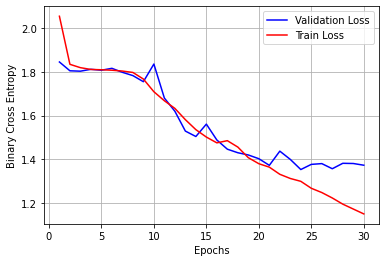

In [36]:
#Plotting Train and Validation Loss
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross Entropy')

x=list(range(1,epoch+1))

vy=his.history['val_loss']
ty=his.history['loss']
plt_dynamic(x,vy,ty,ax)

Text(0.5, 1.0, 'Confusion Matrix')

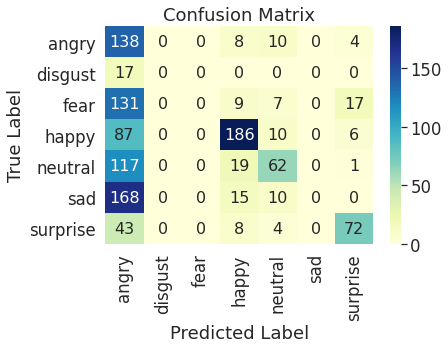

In [38]:
y_pred=model.predict(X_test).round()
#Plotting Confusion Matrix
x=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
Cm_df=pd.DataFrame(x,index=encoder.classes_,columns=encoder.classes_)

sns.set(font_scale=1.5,color_codes=True,palette='deep')
sns.heatmap(Cm_df,annot=True,annot_kws={'size':16},fmt='d',cmap='YlGnBu')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix')

In [40]:
model.save('Emotion_little_vgg.h5')